In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv(r"C:\Users\harin\Downloads\NHS RTT Waiting times ICB Code.csv")

In [10]:
df.head()

,Date,ICB Code,ICB Name,Treatment Function Code,Treatment Function,>0-1,>1-2,>2-3,>3-4,>4-5,...,>97-98,>98-99,>99-100,>100-101,>101-102,>102-103,>103-104,104 plus,Total number of incomplete pathways with a decision to admit for treatment,% of incomplete pathways with a decision to admit for treatment
0,May-25,-,NHS ENGLAND,C_100,General Surgery Service,12,16,23,24,22,...,-,-,-,-,-,-,-,-,563,21.8%
1,May-25,-,NHS ENGLAND,C_101,Urology Service,3,8,5,5,9,...,-,-,-,-,-,-,-,4,340,16.7%
2,May-25,-,NHS ENGLAND,C_110,Trauma and Orthopaedic Service,31,48,67,42,51,...,-,-,-,-,-,-,-,-,"1,857",32.2%
3,May-25,-,NHS ENGLAND,C_120,Ear Nose and Throat Service,38,38,36,41,48,...,-,-,-,-,-,-,-,-,"1,207",28.6%
4,May-25,-,NHS ENGLAND,C_130,Ophthalmology Service,69,94,118,101,86,...,-,-,-,-,-,-,-,-,"1,856",59.4%


In [12]:
df.shape

(1032, 112)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Columns: 112 entries, Date to % of incomplete pathways with a decision to admit for treatment
dtypes: object(112)
memory usage: 903.1+ KB


In [14]:
df.isnull().sum()

Date                                                                          0
ICB Code                                                                      0
ICB Name                                                                      0
Treatment Function Code                                                       0
Treatment Function                                                            0
                                                                             ..
>102-103                                                                      0
>103-104                                                                      0
104 plus                                                                      0
Total number of incomplete pathways with a decision to admit for treatment    0
% of incomplete pathways with a decision to admit for treatment               0
Length: 112, dtype: int64

In [15]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [16]:
df['Date'].head()

0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: Date, dtype: datetime64[ns]

In [17]:
df['Date'].unique()[:10]

<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]

In [18]:
df = pd.read_csv(r"C:\Users\harin\Downloads\NHS RTT Waiting times ICB Code.csv")

In [19]:
df['Date'].head(10)

0    May-25
1    May-25
2    May-25
3    May-25
4    May-25
5    May-25
6    May-25
7    May-25
8    May-25
9    May-25
Name: Date, dtype: object

In [20]:
df['Date'].unique()[:10]

array(['May-25'], dtype=object)

In [22]:
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')


In [23]:
df['Date'].head()

0   2025-05-01
1   2025-05-01
2   2025-05-01
3   2025-05-01
4   2025-05-01
Name: Date, dtype: datetime64[ns]

In [24]:
df['Date'].min(), df['Date'].max()

(Timestamp('2025-05-01 00:00:00'), Timestamp('2025-05-01 00:00:00'))

In [25]:
non_numeric_cols = [
    'Date',
    'ICB Code',
    'ICB Name',
    'Treatment Function Code',
    'Treatment Function'
]

numeric_cols = [col for col in df.columns if col not in non_numeric_cols]

len(numeric_cols)

107

In [26]:
df[numeric_cols] = (
    df[numeric_cols]
    .replace(',', '', regex=True)
    .replace('%', '', regex=True)
    .apply(pd.to_numeric, errors='coerce')
)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Columns: 112 entries, Date to % of incomplete pathways with a decision to admit for treatment
dtypes: datetime64[ns](1), float64(107), object(4)
memory usage: 903.1+ KB


In [28]:
(df[numeric_cols] < 0).sum().sum()

np.int64(0)

In [30]:
[col for col in df.columns if 'total' in col.lower()]


['Total number of incomplete pathways with a decision to admit for treatment']

In [31]:
[col for col in df.columns if '52' in col.lower()]

['>51-52', '>52-53']

In [32]:
# This is to Assign columns
total_waiting_col = 'Total number of incomplete pathways with a decision to admit for treatment'
weeks_52plus_cols = ['>51-52', '>52-53']

# Sum 52+ week waiting for each row
df['52_plus_sum'] = df[weeks_52plus_cols].sum(axis=1)

# To Check for any rows where 52+ week waiting exceeds total waiting
invalid_rows = df[df['52_plus_sum'] > df[total_waiting_col]]

# TO check the output results
print(f"Number of rows where 52+ week waiting > total waiting: {len(invalid_rows)}")
invalid_rows[['52_plus_sum', total_waiting_col]]


Number of rows where 52+ week waiting > total waiting: 0


C:\Users\harin\AppData\Local\Temp\ipykernel_6044\2400422957.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['52_plus_sum'] = df[weeks_52plus_cols].sum(axis=1)


,52_plus_sum,Total number of incomplete pathways with a decision to admit for treatment


In [33]:
df['52_plus_sum'] = df[['>51-52', '>52-53']].sum(axis=1)
df['percent_52_plus'] = (df['52_plus_sum'] / df['Total number of incomplete pathways with a decision to admit for treatment']) * 100
df[['Date', 'percent_52_plus']].head()


C:\Users\harin\AppData\Local\Temp\ipykernel_6044\4030147663.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['percent_52_plus'] = (df['52_plus_sum'] / df['Total number of incomplete pathways with a decision to admit for treatment']) * 100


,Date,percent_52_plus
0,2025-05-01,1.776199
1,2025-05-01,2.058824
2,2025-05-01,1.077006
3,2025-05-01,0.414250
4,2025-05-01,0.646552


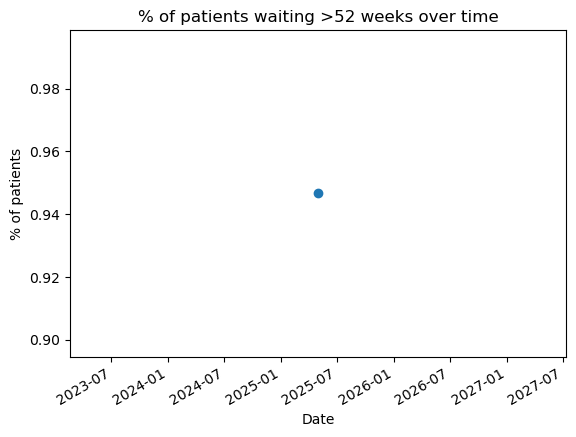

In [34]:
import matplotlib.pyplot as plt

monthly = df.groupby('Date')['percent_52_plus'].mean()
monthly.plot(kind='line', marker='o')
plt.title('% of patients waiting >52 weeks over time')
plt.ylabel('% of patients')
plt.show()


In [35]:
df['flag'] = df['percent_52_plus'] > 5
df[df['flag']]


C:\Users\harin\AppData\Local\Temp\ipykernel_6044\4135438235.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['flag'] = df['percent_52_plus'] > 5


,Date,ICB Code,ICB Name,Treatment Function Code,Treatment Function,>0-1,>1-2,>2-3,>3-4,>4-5,...,>100-101,>101-102,>102-103,>103-104,104 plus,Total number of incomplete pathways with a decision to admit for treatment,% of incomplete pathways with a decision to admit for treatment,52_plus_sum,percent_52_plus,flag
279,2025-05-01,QJM,NHS LINCOLNSHIRE INTEGRATED CARE BOARD,C_410,Rheumatology Service,NaN,1.0,1.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,14.0,0.6,1.0,7.142857,True
393,2025-05-01,QMF,NHS NORTH EAST LONDON INTEGRATED CARE BOARD,C_300,General Internal Medicine Service,NaN,1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,7.0,0.6,1.0,14.285714,True
894,2025-05-01,QVV,NHS DORSET INTEGRATED CARE BOARD,C_150,Neurosurgical Service,2.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13.0,36.1,1.0,7.692308,True
974,2025-05-01,QWU,NHS COVENTRY AND WARWICKSHIRE INTEGRATED CARE ...,C_400,Neurology Service,NaN,1.0,2.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,12.0,0.4,1.0,8.333333,True
982,2025-05-01,QWU,NHS COVENTRY AND WARWICKSHIRE INTEGRATED CARE ...,X06,Other - Other Services,11.0,5.0,9.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,223.0,8.6,12.0,5.381166,True


In [36]:
df.to_csv("NHS_RTT_Cleaned.csv", index=False)